In [6]:
import numpy as np
import pandas as pd

from algorithms.linear_regression import (
    train_test_split,
    LinearReg,
    plot_loss_curve,
    plot_2d_regression,
    plot_2d_slice,
)

# ── Toy “compile-time” dataset (CPU GHz, RAM GB → time [s]) ──────────
data = np.array(
    [
        [2.0, 4, 48],
        [2.2, 4, 45],
        [2.4, 8, 39],
        [2.5, 8, 38],
        [2.7, 16, 32],
        [3.0, 16, 29],
        [3.2, 32, 25],
        [3.4, 32, 23],
        [3.6, 32, 22],
        [3.8, 32, 21],
    ]
)

X, y = data[:, :2], data[:, 2]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_ratio=0.3)

print("Train-shape:", X_tr.shape, "  Test-shape:", X_te.shape)

Train-shape: (7, 2)   Test-shape: (3, 2)


In [7]:
model_cf = LinearReg(method="normal").fit(X_tr, y_tr)

print("θ (closed form) =", model_cf.theta_)
print("R² train =", model_cf.score_R2(X_tr, y_tr).round(3))
print("R² test  =", model_cf.score_R2(X_te, y_te).round(3))

θ (closed form) = [ 7.71507334e+01 -1.50682853e+01 -4.02756702e-02]
R² train = 0.977
R² test  = 0.751


epoch 30    loss=597279892386057232439470136181840387705877698560138084876288.0000
epoch 60    loss=776786941384398176563319679823640132493767765217751789311334908268088768744310668322140704026468582542247004641165312.0000
epoch 90    loss=1010243204228476660588434991857902711856896065951351678805605330943927753289611432920091228126919495455722974176965751882546042229269272125153263685409066845993463646798217216.0000
epoch 120   loss=1313862627338856396226636987072443663567736668389802982932005358062908593528876401812865205082902749746595003413707779448176134890512668292118650435638493137778519927121064957778664985796908864646873377939027821661155273739144790016.0000
epoch 150   loss=1708732111527629514028994862608301846748461433466369080434487669649958045519841629217477577686148554933542136522481386970399941004130714425884048424011371749043568425320617334658939379172067667500044451811026715685094333196195193525459359239979558605241974234010155771065637347827772293120.0000
epoch 180   

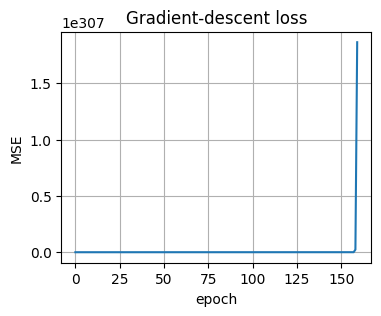

In [8]:
model_gd = LinearReg(
    method="gd",
    lr=0.01,
    epochs=300,
    batch=None,  # full GD
    verbose=True,  # prints every 10 % epochs
).fit(X_tr, y_tr)

plot_loss_curve(model_gd)

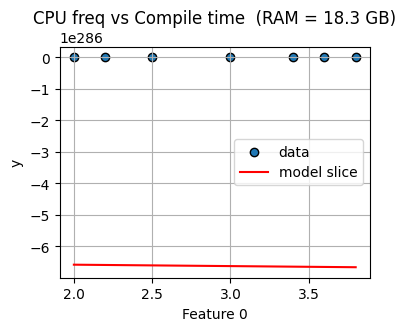

In [9]:
ram_const = X_tr[:, 1].mean()  # fiksiraj RAM na prosjek (~16 GB)

plot_2d_slice(
    model_gd,
    X_tr,
    y_tr,
    vary_index=0,  # feature 0 = CPU GHz
    const_vals={1: ram_const},  # RAM konstanta
    title=f"CPU freq vs Compile time  (RAM = {ram_const:.1f} GB)",
)

In [10]:
new_spec = np.array([[3.1, 12]])  # 3.1 GHz / 12 GB
pred_sec = model_cf.predict(new_spec)[0]

print(
    f"Predicted compile-time for {new_spec[0,0]} GHz / {new_spec[0,1]} GB:",
    f"{pred_sec:.1f} s",
)

Predicted compile-time for 3.1 GHz / 12.0 GB: 30.0 s
